<a href="https://colab.research.google.com/github/ameyas1/Blackpink_Face_Recognition/blob/master/Blackpink_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D,Dropout,Flatten,Activation,Dense

In [2]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

W0622 02:23:52.708121 139715866044288 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.load_weights('drive/My Drive/vgg_face_weights.h5')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
for layer in model.layers:
  layer.trainable = False

In [6]:
last_layer = model.get_layer('conv2d_15')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 1, 1, 2622)


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="cp/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
!mkdir cp

In [0]:
from tensorflow.keras.optimizers import Adam

x=Flatten()(last_output) 
x=Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = Dense  (4, activation='softmax')(x)           

fc_model = Model( model.input, x) 

fc_model.compile(optimizer = Adam(lr=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [10]:
fc_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( )

train_dir='train_p/'

train_generator = datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224)) 

Found 2470 images belonging to 4 classes.


In [12]:
test_datagen = ImageDataGenerator( )

validation_dir='test_p/'

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 64,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 612 images belonging to 4 classes.


In [13]:
history = fc_model.fit_generator(train_generator,steps_per_epoch = 20,epochs = 200,validation_data=validation_generator,validation_steps = 10,verbose = 2,callbacks=callbacks_list)

Epoch 1/200

Epoch 00001: val_acc improved from -inf to 0.83824, saving model to cp/weights-01-0.84.hdf5
20/20 - 26s - loss: 15.7273 - acc: 0.5648 - val_loss: 4.2561 - val_acc: 0.8382
Epoch 2/200

Epoch 00002: val_acc improved from 0.83824 to 0.88889, saving model to cp/weights-02-0.89.hdf5
20/20 - 18s - loss: 5.6186 - acc: 0.7687 - val_loss: 1.5181 - val_acc: 0.8889
Epoch 3/200

Epoch 00003: val_acc did not improve from 0.88889
20/20 - 11s - loss: 4.1012 - acc: 0.8006 - val_loss: 1.8576 - val_acc: 0.8856
Epoch 4/200

Epoch 00004: val_acc did not improve from 0.88889
20/20 - 12s - loss: 3.3565 - acc: 0.8234 - val_loss: 1.3303 - val_acc: 0.8873
Epoch 5/200

Epoch 00005: val_acc did not improve from 0.88889
20/20 - 12s - loss: 3.7386 - acc: 0.8070 - val_loss: 1.4830 - val_acc: 0.8873
Epoch 6/200

Epoch 00006: val_acc improved from 0.88889 to 0.90686, saving model to cp/weights-06-0.91.hdf5
20/20 - 16s - loss: 4.0337 - acc: 0.7812 - val_loss: 1.3161 - val_acc: 0.9069
Epoch 7/200

Epoch 00

In [0]:
fc_model.load_weights("cp/weights-184-0.94.hdf5")

In [0]:
model.compile(optimizer = Adam(lr=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [0]:
id_dict={0:'Jennie',1:'Jisoo',2:'Lisa',3:'Rose'}

In [0]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [0]:
from urllib.request import urlopen
import os
import bz2


def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()

    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)


dst_dir = 'model1'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

In [0]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from align import AlignDlib

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
#     b,g,r = cv2.split(img)     
#     img = cv2.merge([r,g,b])
#     return img
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('model1/landmarks.dat')

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

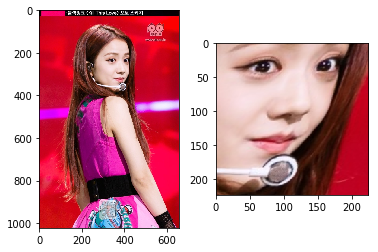

it's Jisoo


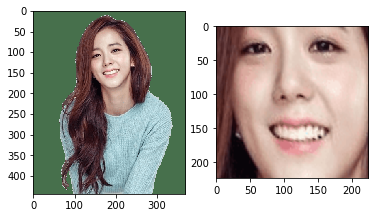

it's Jisoo


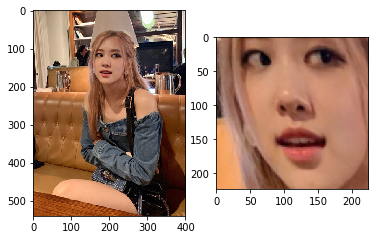

it's Rose


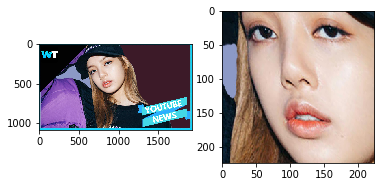

it's Lisa


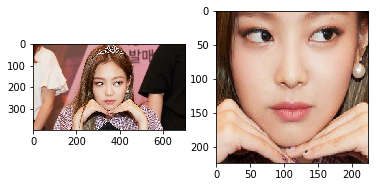

it's Jennie


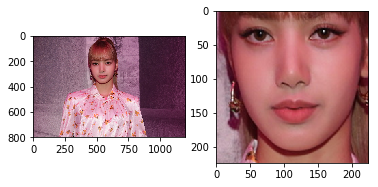

it's Lisa


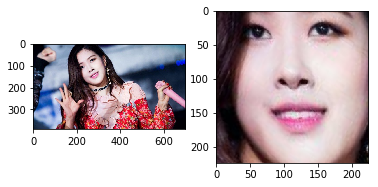

it's Rose


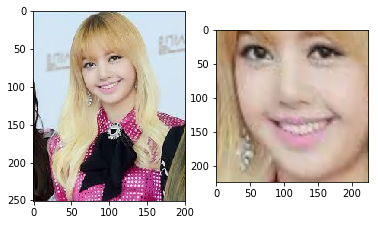

it's Lisa


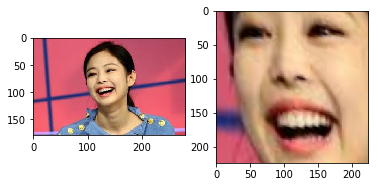

it's Jennie


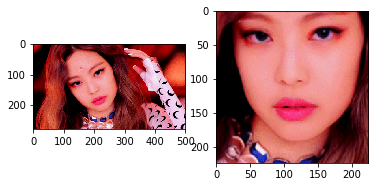

it's Jennie


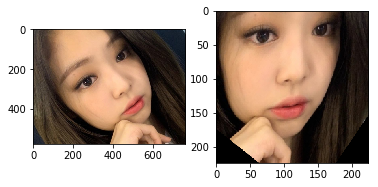

it's Jennie


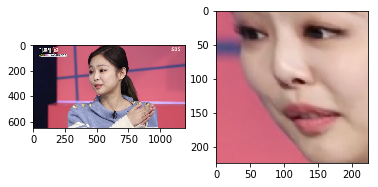

it's Jennie


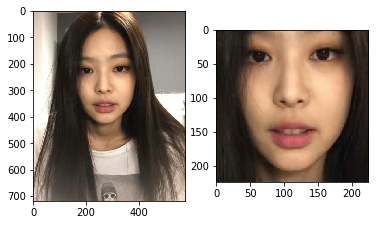

it's Jennie


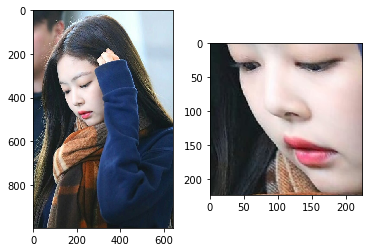

it's Jennie


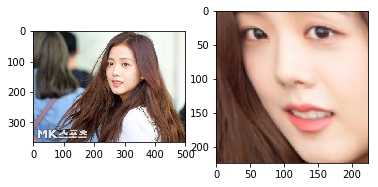

it's Jisoo


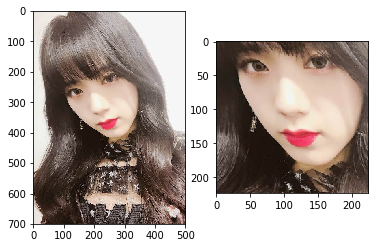

it's Jisoo


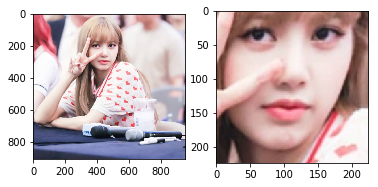

it's Lisa


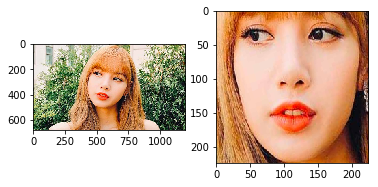

it's Lisa


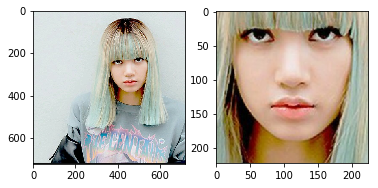

it's Lisa


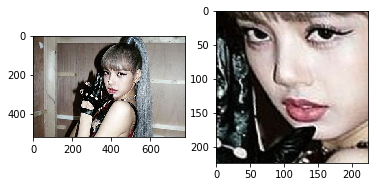

it's Lisa


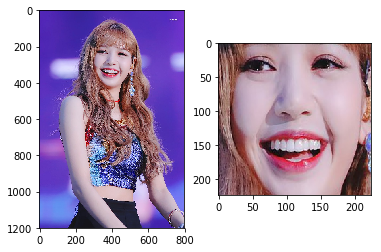

it's Lisa


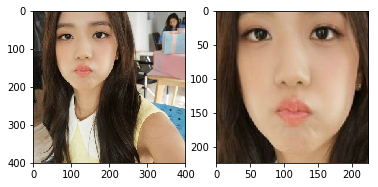

it's Jisoo


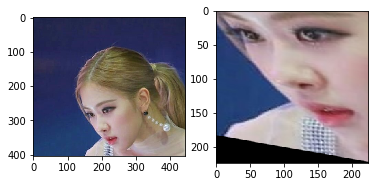

it's Jennie


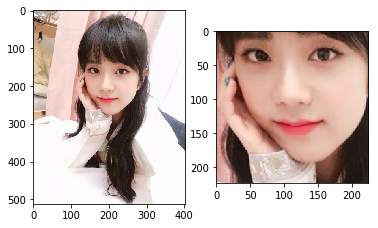

it's Jisoo


In [24]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

# uploaded=files.upload()
count=0
for fn in uploaded.keys():
  
  count=count+1
 
  # predicting images
  path='/content/' + fn
  
  img=load_image(path)
  bb = alignment.getLargestFaceBoundingBox(img)
  face = alignment.align(224, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
  
  plt.title(count)
  plt.subplot(121)
  plt.imshow(img) 
  plt.subplot(122)
  plt.imshow(face)
  plt.show()
  plt.close()
  
  x=image.img_to_array(face)
  x = preprocess_input(x)
  x=np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  
  classes = fc_model.predict(images, batch_size=32)[0]
  
  id=np.argmax(classes)
  for i in id_dict:
    if i==id:
      identity=id_dict[id]
      print ("it's " + str(identity))
      
      

  adding: cp/weights-89-1.14.hdf5 (deflated 6%)


In [25]:
import os
import shutil


shutil.move("cp/", "drive/My Drive")

'drive/My Drive/cp'